<a href="https://colab.research.google.com/github/HaiDang2107/MallCustomerSegmentation/blob/main/MallCustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Reading data

Import:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print("pandas version: {}".format(pd.__version__))
print("seaborn version: {}".format(sns.__version__))
print("numpy version: {}".format(np.__version__))

pandas version: 2.2.2
seaborn version: 0.13.2
numpy version: 2.0.2


Mouth:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/Mall Customer Segmentation/Mall_Customers.csv'
mall_data = pd.read_csv(file_path)

print('There are {} rows and {} columns in this dataset.'.format(mall_data.shape[0], mall_data.shape[1]))


Mounted at /content/drive
There are 200 rows and 5 columns in this dataset.


Discover the dataset:

In [ ]:
mall_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
70,71,Male,70,49,55
137,138,Male,32,73,73
136,137,Female,44,73,7
117,118,Female,49,65,59
185,186,Male,30,99,97
40,41,Female,65,38,35
112,113,Female,38,64,42
5,6,Female,22,17,76
51,52,Male,33,42,60
86,87,Female,55,57,58


In [ ]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
mall_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


==> There are no missing data

#2. Exploratory data analysis

### A. Distribution

We will explore the dataset based on gender - a binary variable

####1. Gender - Age

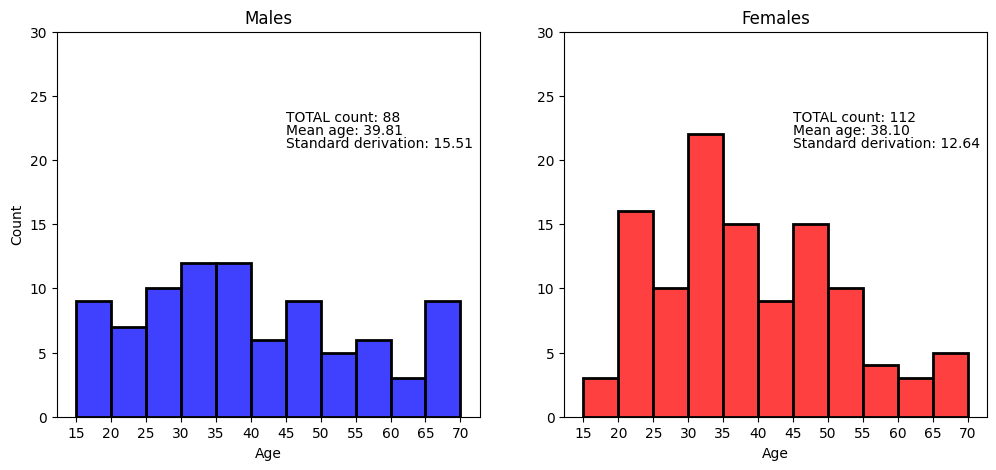

In [ ]:
# <DataFrame>[filtering condition][col]
males_age = mall_data[mall_data['Gender'] == 'Male']['Age']
females_age = mall_data[mall_data['Gender'] == 'Female']['Age']

# range(start, stop, step)
age_bins = range(15, 75, 5)

# draw 2 axes (2 histogram) in a figure
# plt.subplots(1, 2, ...): create 1 row and 2 columns (2 histograms are next to each other)
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True) # sharey ~ share y

# draw male histogram
sns.histplot(males_age, bins=age_bins, ax=ax1, kde=False, color='blue', edgecolor="k", linewidth=2)
ax1.set_title('Males')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.set_ylim(top=30) # max value of the y axis
ax1.set_xticks(age_bins) # levels of the x axis
ax1.text(45, 23, "TOTAL count: {}".format(males_age.count())) # (45, 23): where we place the text
ax1.text(45, 22, "Mean age: {:.2f}".format(males_age.mean()))
ax1.text(45, 21, "Standard derivation: {:.2f}".format(males_age.std()))

# draw female histogram
sns.histplot(females_age, bins=age_bins, ax=ax2, kde=False, color='red', edgecolor="k", linewidth=2)
ax2.set_title('Females')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')
ax2.set_ylim(top=30)
ax2.set_xticks(age_bins)
ax2.text(45, 23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45, 22, "Mean age: {:.2f}".format(females_age.mean()))
ax2.text(45, 21, "Standard derivation: {:.2f}".format(females_age.std()))
ax2.tick_params(labelleft=True) # display level in the y-axis of the second histogram

plt.show()


Comments:
- The average age of male customers is lightly higher than female ones
- Distribution of male age is more uniform (đồng đều) than female one
- The biggest age group is 30-35 year old.

Kolgomorov-Smirnov test (K-S test):
- Used to check whether 2 data samples have the same distribution
- p-value < 0.05 ==> significant difference

In [ ]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


==> The difference between two distributions is statistically insignificant

####2. Gender - Income

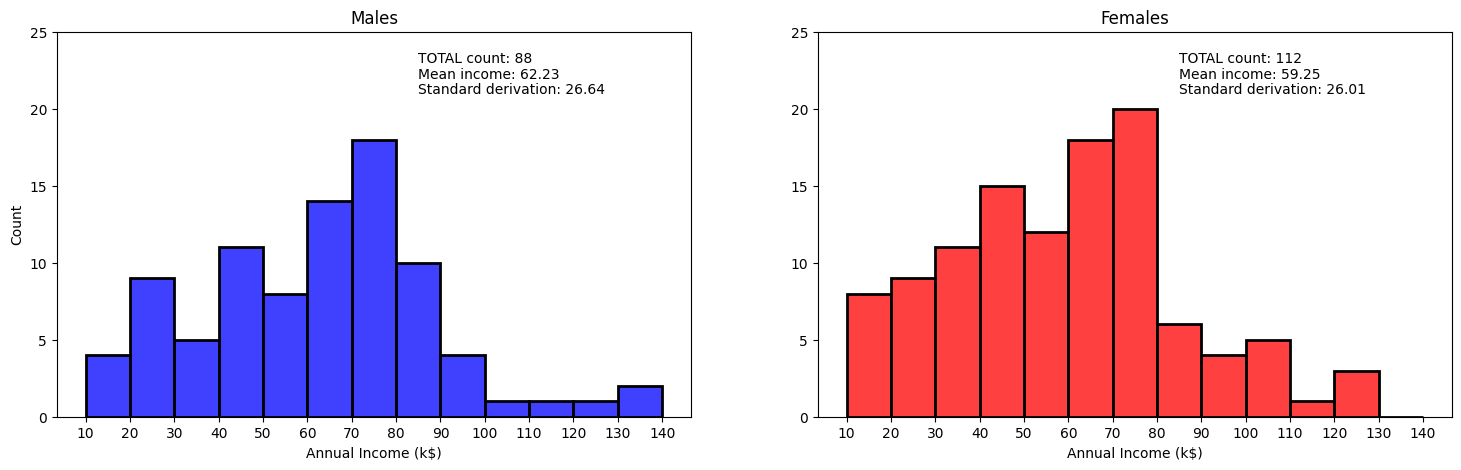

In [ ]:
males_income = mall_data[mall_data['Gender'] == 'Male']['Annual Income (k$)']
females_income = mall_data[mall_data['Gender'] == 'Female']['Annual Income (k$)']

# range(start, stop, step)
income_bins = range(10, 150, 10)

fig3, (ax3, ax4) = plt.subplots(1, 2, figsize=(18,5), sharey=True)

# Male
sns.histplot(data=males_income, bins=income_bins, ax=ax3, kde=False, color='blue', edgecolor="k", linewidth=2)
ax3.set_title('Males')
ax3.set_xlabel('Annual Income (k$)')
ax3.set_ylabel('Count')
ax3.set_ylim(top=25)
ax3.set_xticks(income_bins)
ax3.text(85, 23, "TOTAL count: {}".format(males_income.count()))
ax3.text(85, 22, "Mean income: {:.2f}".format(males_income.mean()))
ax3.text(85, 21, "Standard derivation: {:.2f}".format(males_income.std()))

sns.histplot(data=females_income, bins=income_bins, ax=ax4, kde=False, color='red', edgecolor="k", linewidth=2)
ax4.set_title('Females')
ax4.set_xlabel('Annual Income (k$)')
ax4.set_ylabel('Count')
ax4.set_ylim(top=25)
ax4.set_xticks(income_bins)
ax4.text(85, 23, "TOTAL count: {}".format(females_income.count()))
ax4.text(85, 22, "Mean income: {:.2f}".format(females_income.mean()))
ax4.text(85, 21, "Standard derivation: {:.2f}".format(females_income.std()));
ax4.tick_params(labelleft=True)

Comments:
- The mean income of male customers is higher than female ones
- The standard derivation is the same for both gender
- The highest income in both genders is 70-80 k$

K-S test:

In [ ]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


==> The difference between 2 distributions is statistically insignificant

####3. Gender - Spending score

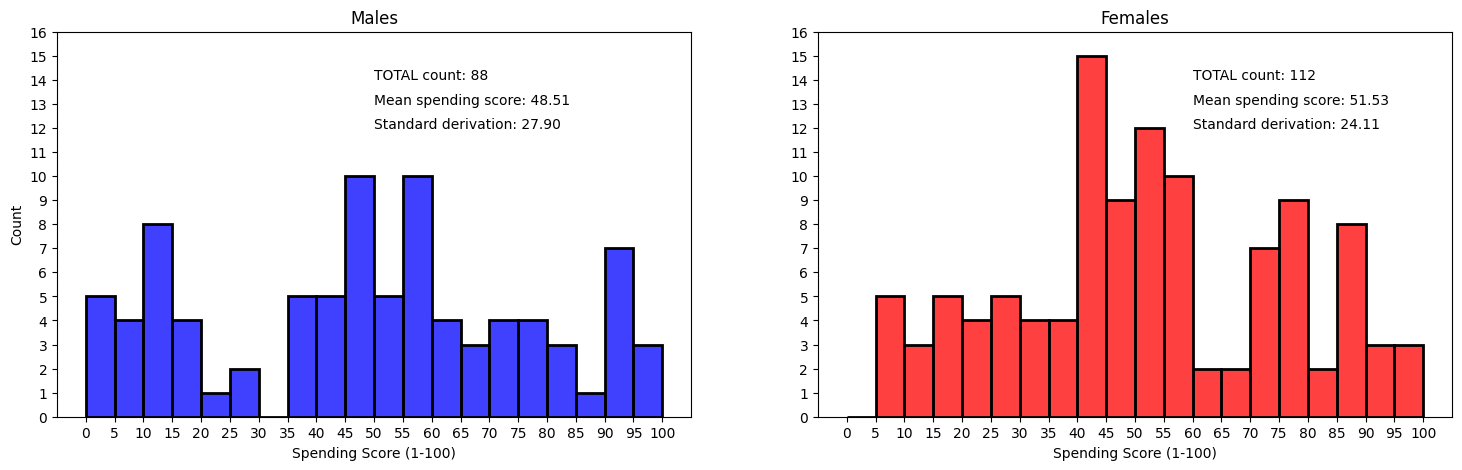

In [ ]:
males_spending_score = mall_data[mall_data['Gender'] == 'Male']['Spending Score (1-100)']
females_spending_score = mall_data[mall_data['Gender'] == 'Female']['Spending Score (1-100)']

spd_score_bins = range(0, 105, 5)

# Male
fig4, (ax5, ax6) = plt.subplots(1, 2, figsize=(18,5), sharey=True)
sns.histplot(data=males_spending_score, bins=spd_score_bins, ax=ax5, kde=False, color='blue', edgecolor="k", linewidth=2)
ax5.set_title('Males')
ax5.set_xlabel('Spending Score (1-100)')
ax5.set_ylabel('Count')
ax5.set_ylim(0, 16)
ax5.set_yticks(range(0, 17, 1))
ax5.set_xticks(spd_score_bins)
ax5.text(50, 14, "TOTAL count: {}".format(males_spending_score.count()))
ax5.text(50, 13, "Mean spending score: {:.2f}".format(males_spending_score.mean()))
ax5.text(50, 12, "Standard derivation: {:.2f}".format(males_spending_score.std()))

# Female
sns.histplot(data=females_spending_score, bins=spd_score_bins, ax=ax6, kde=False, color='red', edgecolor="k", linewidth=2)
ax6.set_title('Females')
ax6.set_xlabel('Spending Score (1-100)')
ax6.set_ylabel('Count')
ax6.set_ylim(0, 16)
ax6.set_yticks(range(0, 17, 1))
ax6.set_xticks(spd_score_bins)
ax6.text(60, 14, "TOTAL count: {}".format(females_spending_score.count()))
ax6.text(60, 13, "Mean spending score: {:.2f}".format(females_spending_score.mean()))
ax6.text(60, 12, "Standard derivation: {:.2f}".format(females_spending_score.std()));
ax6.tick_params(labelleft=True)

plt.show()

Comment
- The mean spending score of female customers is larger than male ones
- The spending score distribution of male customers is more uniform than female ones
- The standard derivation of male customers is higher than female customes

K-S test:

In [ ]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


==> The spending score distributions between two genders are statistically similar

####4. Median income for all age groups

<ipython-input-12-184e69e3aa6f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_by_age_group = mall_data.groupby(['Gender', pd.cut(mall_data['Age'], age_bins)]).median()


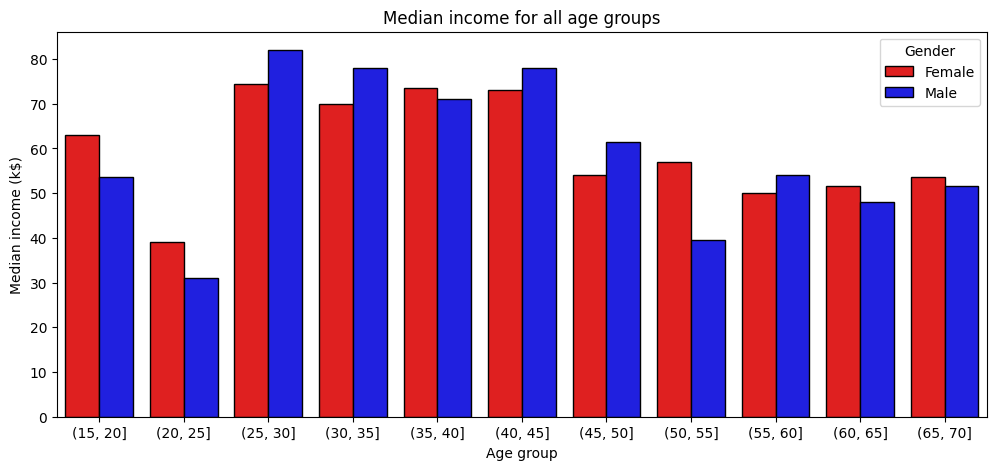

In [ ]:
# pd.cut(attribute, bins): divide data into value bins of the attribute
# data_frame.groupby([attribute1, attribute2, ...]): group by attribute1, attribute2, ...
# median(): calculate median for remaining attributes
medians_by_age_group = mall_data.groupby(['Gender', pd.cut(mall_data['Age'], age_bins)]).median()

# multiIndex: Gender + pd.cut() (noname) ==> set name
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])

# convert index --> column
medians_by_age_group.reset_index(inplace=True)

# draw bar chart
fig5, ax = plt.subplots(figsize=(12, 5))

# hue ~ discriminate (in a age_group) by color (gender)
# x, y: name of attribues in the dataframe
sns.barplot(data=medians_by_age_group, x='Age_group', y='Annual Income (k$)', hue='Gender', palette=['red', 'blue'], edgecolor='k', ax=ax)

ax.set_title('Median income for all age groups')
ax.set_xlabel('Age group')
ax.set_ylabel('Median income (k$)')

# Title for legend (ghi chú)
ax.legend(title='Gender', loc='upper right')

plt.show()

Comments:
- The most wealthy customers are in age of 25-45 year old
- The biggest difference between women and men is in age group 25-35 (male more rich) and 50-55 (female more rich)

###B. Correlation

Correlation measures the relationship between 2 variables (2 aspects: direction and intensity)
Correlation:
- Positive correlation: both variables increases/decreases
- Negative correlation: one variable increases/decreases, the other decreases/increases
- No correlation: No conclusion

In [ ]:
from scipy.stats import pearsonr

# calculate correlation
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

print('Correlation between male age and income: {:.2f}'.format(corr1))
print('Correlation between female age and income: {:.2f}'.format(corr2))

Correlation between male age and income: -0.09
Correlation between female age and income: 0.06


==> Weak negative correlation, there is almost no correlation between age and income in both gender

In [ ]:
corr3, _ = pearsonr(males_age.values, males_spending_score.values)
corr4, _ = pearsonr(females_age.values, females_spending_score.values)

print('Correlation between male age and spending score: {:.2f}'.format(corr3))
print('Correlation between female age and spending score: {:.2f}'.format(corr4))

Correlation between male age and spending score: -0.28
Correlation between female age and spending score: -0.38


==> Negative correlation. That means the younger customers are, the more money they spends

In [ ]:
corr5, _ = pearsonr(males_income.values, males_spending_score.values)
corr6, _ = pearsonr(females_income.values, females_spending_score.values)

print('Correlation between male income and spending score: {:.2f}'.format(corr5))
print('Correlation between female income and spending score: {:.2f}'.format(corr6))

Correlation between male income and spending score: -0.02
Correlation between female income and spending score: 0.05


#3. Clustering

###1. K-Means

Training data:

In [ ]:
# Get age, annual income, spending score
x_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

**Note**: we do not use gender because it is binary variable, which is not suitable for K-means (K-means uses Euclidean distance)

Use KElbowVisualizer to find k:

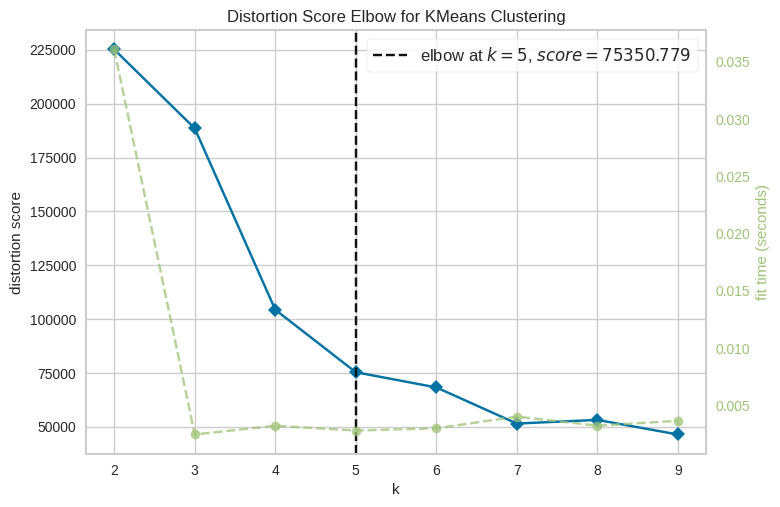

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion')
visualizer.fit(x_numerics)
visualizer.show()
plt.show()

==> k = 5

Train the model with k = 5

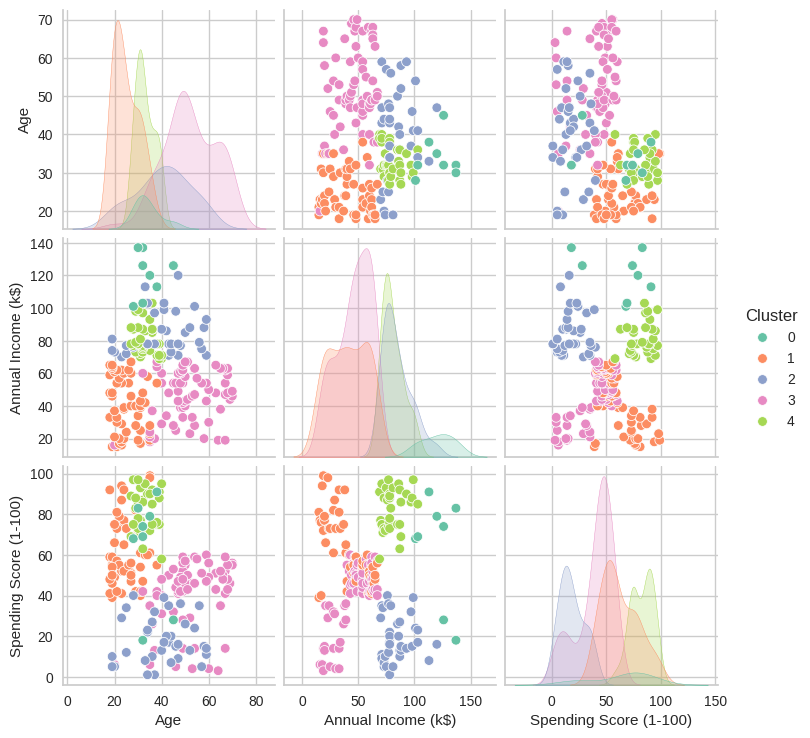

In [ ]:
model = KMeans(n_clusters=5, init='k-means++')
model.fit(x_numerics)

new_x_numerics = x_numerics.copy() # copy

# add attribute (column) cluster
new_x_numerics['Cluster'] = model.labels_ # model.labels_ contains labels of clusters

sns.pairplot(new_x_numerics, hue='Cluster', palette='Set2')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(new_x_numerics,
                    x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
                    color='Cluster',
                    color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(title='3D Cluster Plot')
fig.show()

Size of the clusters

In [ ]:
cluster_sizes = new_x_numerics['Cluster'].value_counts().sort_index()
cluster_sizes

,count
Cluster,
0,8
1,53
2,36
3,69
4,34


Comments:
- We can see that data is clustered well with 2 attributes: annual income and spending score
- 5 clusters:
      (0): customers with high income and middle age
      (1): customers < 40 years with low or middle income, high spending score (poor + usually go shopping) - occupy most data
      (2): customers with medium or high income and low spending score (normal/rich + rarely shopping)
      (3): customers > 35 years old with low/medium income and low/medium spending score (rich + usually go shopping)
      (4): customer < 40 and > 25 with medium/high income and high speding score (normal + usually go shopping)






###2. DBSCAN

2 hyperparameters: minPts and eps </br>
Based on experience, minPts = 3, 4, 5, 6 (dim + 1) with 2D/3D </br>
We use k-distance diagram to choose eps

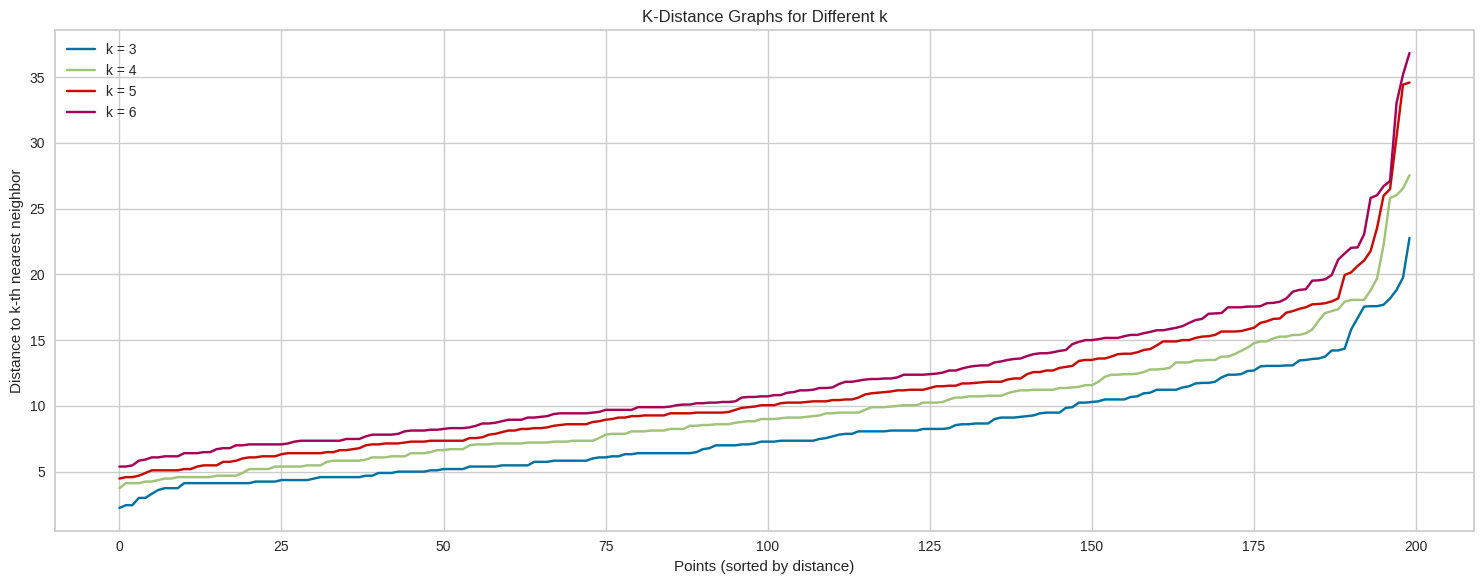

In [ ]:
from sklearn.neighbors import NearestNeighbors

k_values = [3, 4, 5, 6]

plt.figure(figsize=(15, 6))

for k in k_values:
    nbrs = NearestNeighbors(n_neighbors=k)
    nbrs.fit(x_numerics)

    # get distance to k nearest neighbors (n x k matrix)
    distances, _ = nbrs.kneighbors(x_numerics)

    # get distance to k-th distance (distance[:, -1]: the last column)
    k_distances = np.sort(distances[:, -1])

    # draw
    plt.plot(k_distances, label=f'k = {k}')

plt.title("K-Distance Graphs for Different k")
plt.xlabel("Points (sorted by distance)")
plt.ylabel("Distance to k-th nearest neighbor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Try several times:

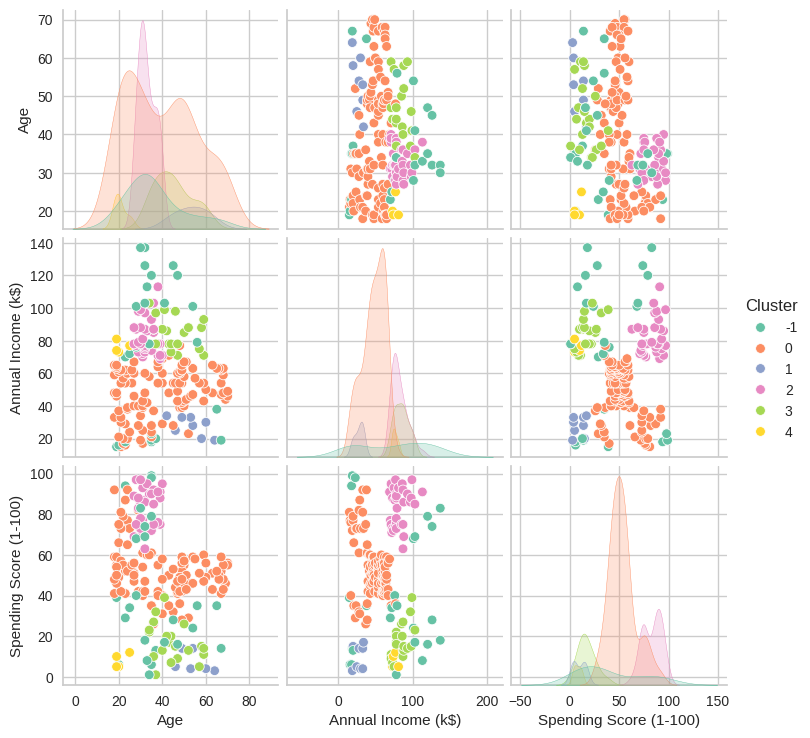

In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=12.2, min_samples=4)

model.fit(x_numerics)

new_x_numerics = x_numerics.copy()
new_x_numerics['Cluster'] = model.labels_

sns.pairplot(new_x_numerics, hue='Cluster', palette='Set2')

In [ ]:
cluster_sizes = new_x_numerics['Cluster'].value_counts().sort_index()
cluster_sizes

,count
Cluster,
-1,26
0,101
1,7
2,8
3,34
4,20
5,4


In [ ]:
import plotly.express as px

fig = px.scatter_3d(new_x_numerics,
                    x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
                    color='Cluster',
                    color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(title='3D Cluster Plot')
fig.show()

Attribute Normalization

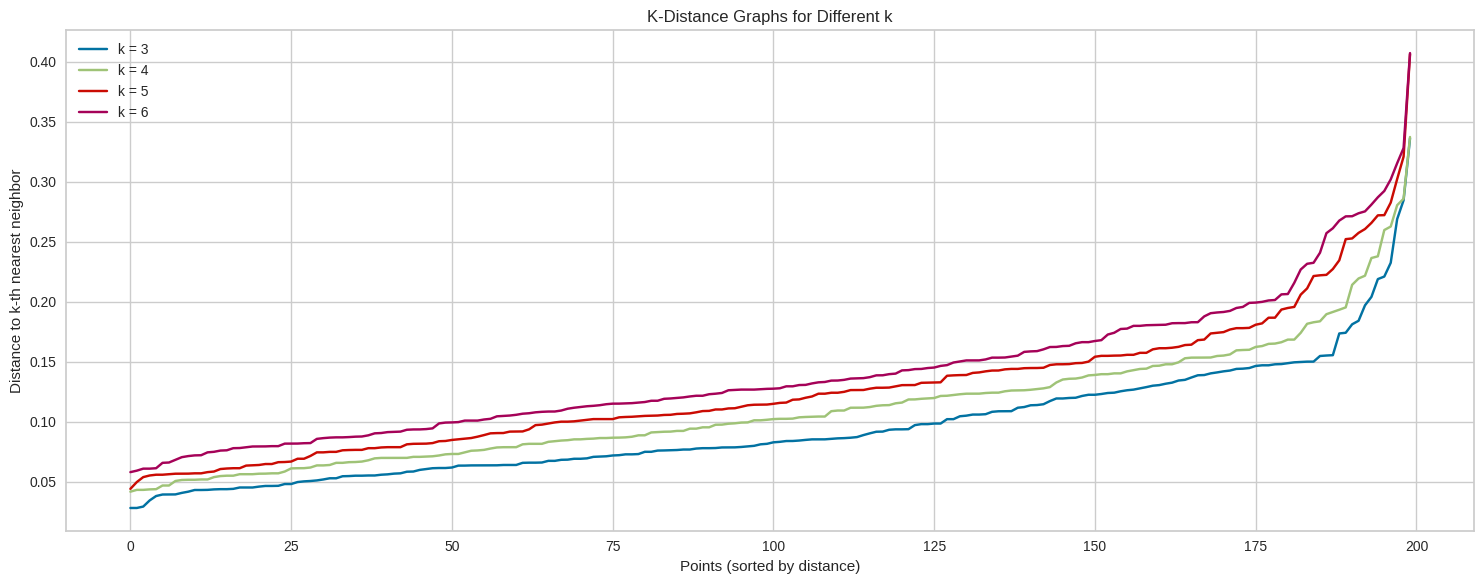

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_scaled = MinMaxScaler().fit_transform(x_numerics)

k_values = [3, 4, 5, 6]

plt.figure(figsize=(15, 6))

for k in k_values:
    nbrs = NearestNeighbors(n_neighbors=k)
    nbrs.fit(x_scaled)

    # get distance to k nearest neighbors (n x k matrix)
    distances, _ = nbrs.kneighbors(x_scaled)

    # get distance to k-th distance (distance[:, -1]: the last column)
    k_distances = np.sort(distances[:, -1])

    # draw
    plt.plot(k_distances, label=f'k = {k}')

plt.title("K-Distance Graphs for Different k")
plt.xlabel("Points (sorted by distance)")
plt.ylabel("Distance to k-th nearest neighbor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

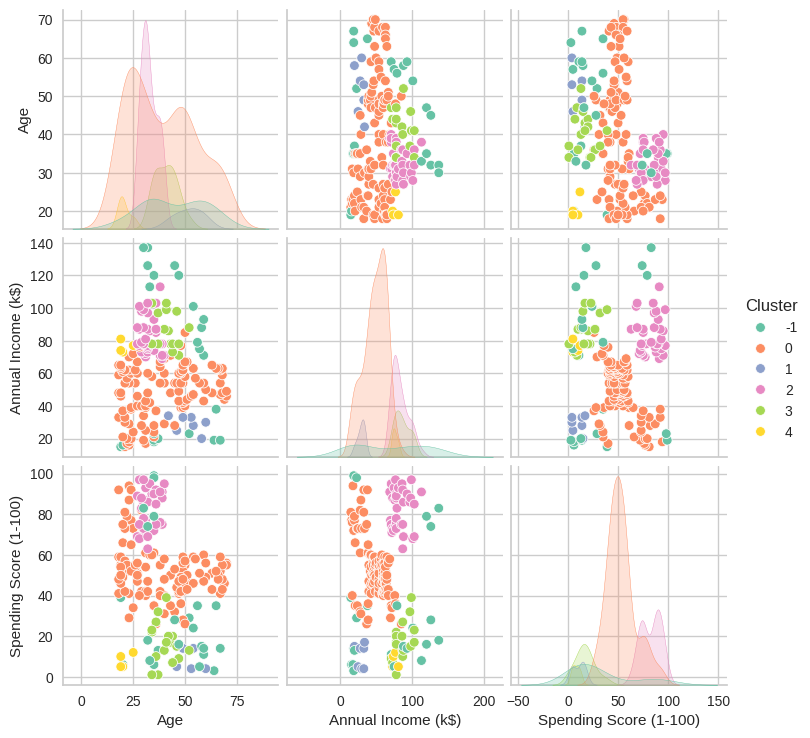

In [ ]:
model = DBSCAN(eps=0.14, min_samples=4)

model.fit(x_scaled)

x_origin = x_numerics.copy()
x_origin['Cluster'] = model.labels_

sns.pairplot(x_origin, hue='Cluster', palette='Set2')

In [ ]:
fig = px.scatter_3d(x_origin,
                    x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
                    color='Cluster',
                    color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(title='3D Cluster Plot')
fig.show()

When we apply attribute normalization, it seems to be easy to choose eps and minPts